Will be focusing on US-Euro exchange rates.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.style as style
#Enables Jupyter to display graphs
%matplotlib inline

In [2]:
exchange_rates = pd.read_csv('euro-daily-hist_1999_2020.csv')
exchange_rates.head()

,Period\Unit:,[Australian dollar ],[Bulgarian lev ],[Brazilian real ],[Canadian dollar ],[Swiss franc ],[Chinese yuan renminbi ],[Cypriot pound ],[Czech koruna ],[Danish krone ],...,[Romanian leu ],[Russian rouble ],[Swedish krona ],[Singapore dollar ],[Slovenian tolar ],[Slovak koruna ],[Thai baht ],[Turkish lira ],[US dollar ],[South African rand ]
0,2021-01-08,1.5758,1.9558,6.5748,1.5543,1.0827,7.9184,NaN,26.163,7.4369,...,4.8708,90.8000,10.0510,1.6228,NaN,NaN,36.8480,9.0146,1.2250,18.7212
1,2021-01-07,1.5836,1.9558,6.5172,1.5601,1.0833,7.9392,NaN,26.147,7.4392,...,4.8712,91.2000,10.0575,1.6253,NaN,NaN,36.8590,8.9987,1.2276,18.7919
2,2021-01-06,1.5824,1.9558,6.5119,1.5640,1.0821,7.9653,NaN,26.145,7.4393,...,4.8720,90.8175,10.0653,1.6246,NaN,NaN,36.9210,9.0554,1.2338,18.5123
3,2021-01-05,1.5927,1.9558,6.5517,1.5651,1.0803,7.9315,NaN,26.227,7.4387,...,4.8721,91.6715,10.0570,1.6180,NaN,NaN,36.7760,9.0694,1.2271,18.4194
4,2021-01-04,1.5928,1.9558,6.3241,1.5621,1.0811,7.9484,NaN,26.141,7.4379,...,4.8713,90.3420,10.0895,1.6198,NaN,NaN,36.7280,9.0579,1.2296,17.9214


In [3]:
exchange_rates.tail()

,Period\Unit:,[Australian dollar ],[Bulgarian lev ],[Brazilian real ],[Canadian dollar ],[Swiss franc ],[Chinese yuan renminbi ],[Cypriot pound ],[Czech koruna ],[Danish krone ],...,[Romanian leu ],[Russian rouble ],[Swedish krona ],[Singapore dollar ],[Slovenian tolar ],[Slovak koruna ],[Thai baht ],[Turkish lira ],[US dollar ],[South African rand ]
5694,1999-01-08,1.8406,NaN,NaN,1.7643,1.6138,NaN,0.58187,34.938,7.4433,...,1.3143,27.2075,9.1650,1.9537,188.8400,42.560,42.5590,0.3718,1.1659,6.7855
5695,1999-01-07,1.8474,NaN,NaN,1.7602,1.6165,NaN,0.58187,34.886,7.4431,...,1.3092,26.9876,9.1800,1.9436,188.8000,42.765,42.1678,0.3701,1.1632,6.8283
5696,1999-01-06,1.8820,NaN,NaN,1.7711,1.6116,NaN,0.58200,34.850,7.4452,...,1.3168,27.4315,9.3050,1.9699,188.7000,42.778,42.6949,0.3722,1.1743,6.7307
5697,1999-01-05,1.8944,NaN,NaN,1.7965,1.6123,NaN,0.58230,34.917,7.4495,...,1.3168,26.5876,9.4025,1.9655,188.7750,42.848,42.5048,0.3728,1.1790,6.7975
5698,1999-01-04,1.9100,NaN,NaN,1.8004,1.6168,NaN,0.58231,35.107,7.4501,...,1.3111,25.2875,9.4696,1.9554,189.0450,42.991,42.6799,0.3723,1.1789,6.9358


In [4]:
exchange_rates.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5699 entries, 0 to 5698
Data columns (total 41 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Period\Unit:              5699 non-null   object 
 1   [Australian dollar ]      5699 non-null   object 
 2   [Bulgarian lev ]          5297 non-null   object 
 3   [Brazilian real ]         5431 non-null   object 
 4   [Canadian dollar ]        5699 non-null   object 
 5   [Swiss franc ]            5699 non-null   object 
 6   [Chinese yuan renminbi ]  5431 non-null   object 
 7   [Cypriot pound ]          2346 non-null   object 
 8   [Czech koruna ]           5699 non-null   object 
 9   [Danish krone ]           5699 non-null   object 
 10  [Estonian kroon ]         3130 non-null   object 
 11  [UK pound sterling ]      5699 non-null   object 
 12  [Greek drachma ]          520 non-null    object 
 13  [Hong Kong dollar ]       5699 non-null   object 
 14  [Croatia

The dataset contains  data for 40 different currencies. Mostg of them appear as "object" meaning the data will have to be cleaned up. As well as several missing data, most notably, Cypriot, and Greek drachma.

In [5]:
exchange_rates.rename(columns={'[US dollar ]': 'US_dollar',
                               'Period\\Unit:': 'Time'},
                      inplace=True)
exchange_rates['Time'] = pd.to_datetime(exchange_rates['Time'])
exchange_rates.sort_values('Time', inplace=True)
exchange_rates.reset_index(drop=True, inplace=True)

In [6]:
euro_to_dollar = exchange_rates[['Time', 'US_dollar']].copy()
euro_to_dollar.head()

,Time,US_dollar
0,1999-01-04,1.1789
1,1999-01-05,1.1790
2,1999-01-06,1.1743
3,1999-01-07,1.1632
4,1999-01-08,1.1659


In [7]:
euro_to_dollar.tail()

,Time,US_dollar
5694,2021-01-04,1.2296
5695,2021-01-05,1.2271
5696,2021-01-06,1.2338
5697,2021-01-07,1.2276
5698,2021-01-08,1.2250


In [8]:
euro_to_dollar['US_dollar'].value_counts()

-         62
1.2276     9
1.1215     8
1.1305     7
1.1193     6
          ..
1.3322     1
1.0064     1
1.0015     1
1.3364     1
0.9014     1
Name: US_dollar, Length: 3528, dtype: int64

We can see here, that value of "-" appears 62 times. Need to drop the rows.

In [9]:
euro_to_dollar = euro_to_dollar[euro_to_dollar['US_dollar']!='-']

In [10]:
euro_to_dollar['US_dollar'].value_counts()

1.2276    9
1.1215    8
1.1305    7
1.1193    6
1.1218    6
         ..
1.3322    1
1.0064    1
1.0015    1
1.3364    1
1.4240    1
Name: US_dollar, Length: 3527, dtype: int64

In [11]:
euro_to_dollar['US_dollar'] = euro_to_dollar['US_dollar'].astype(float)
euro_to_dollar.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5637 entries, 0 to 5698
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Time       5637 non-null   datetime64[ns]
 1   US_dollar  5637 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 132.1 KB


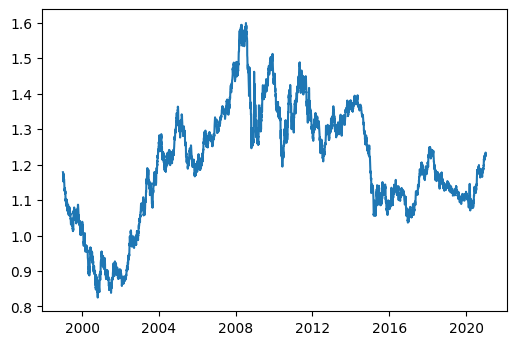

In [12]:
plt.plot(euro_to_dollar['Time'],
         euro_to_dollar['US_dollar'])
plt.show()

We can see many raises and dips, because we're trying to plot daily data of over 20 years. Let's try to simplify to Monthly data using a rolling mean.

In [13]:
rolling_mean = euro_to_dollar['US_dollar'].rolling(30).mean()
euro_to_dollar.insert(2, 'rolling_mean', rolling_mean)
euro_to_dollar.tail()

,Time,US_dollar,rolling_mean
5694,2021-01-04,1.2296,1.211170
5695,2021-01-05,1.2271,1.212530
5696,2021-01-06,1.2338,1.213987
5697,2021-01-07,1.2276,1.215357
5698,2021-01-08,1.2250,1.216557


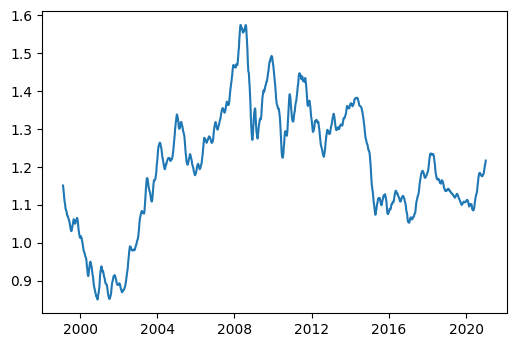

In [14]:
plt.plot(euro_to_dollar['Time'],
         euro_to_dollar['rolling_mean'])
plt.show()

Let's explore how USD-EUR exchange rates changed along with different US presidents. This data covers the last thee. George W. Bush (2001-2009), Barack Obama (2009-2017), and Donald Trump (2017-2021)

In [15]:
three_presidents = euro_to_dollar[(euro_to_dollar['Time'].dt.year >= 2001) &
                                  (euro_to_dollar['Time'].dt.year < 2021)]
three_presidents.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5118 entries, 521 to 5693
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Time          5118 non-null   datetime64[ns]
 1   US_dollar     5118 non-null   float64       
 2   rolling_mean  5118 non-null   float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 159.9 KB


In [16]:
three_presidents.head()

,Time,US_dollar,rolling_mean
521,2001-01-02,0.9423,0.883343
522,2001-01-03,0.9530,0.886660
523,2001-01-04,0.9458,0.889893
524,2001-01-05,0.9545,0.893463
525,2001-01-08,0.9497,0.897023


In [17]:
three_presidents.tail()

,Time,US_dollar,rolling_mean
5689,2020-12-24,1.2193,1.204173
5690,2020-12-28,1.2219,1.205520
5691,2020-12-29,1.2259,1.206950
5692,2020-12-30,1.2281,1.208280
5693,2020-12-31,1.2271,1.209623


In [18]:
bush = three_presidents[three_presidents['Time'].dt.year < 2009]
obama = three_presidents[(three_presidents['Time'].dt.year > 2008) &
                        (three_presidents['Time'].dt.year < 2017 )]
trump = three_presidents[three_presidents['Time'].dt.year > 2016]

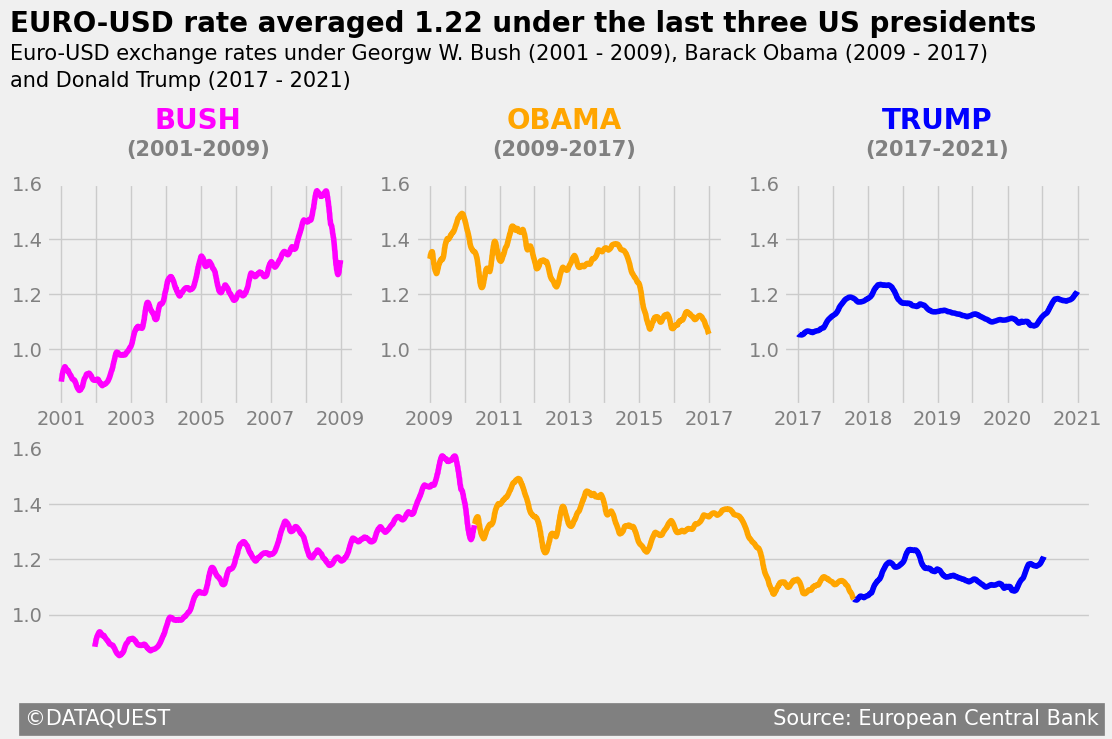

In [36]:
style.use('fivethirtyeight')
plt.figure(figsize=(12,6))
ax1 = plt.subplot(2, 3, 1) #Two rows, three colums, position 1
ax2 = plt.subplot(2, 3, 2)
ax3 = plt.subplot(2, 3, 3)
ax4 = plt.subplot(2, 1, 2) #Solution (2,1,2) dunno why
axes = [ax1, ax2, ax3, ax4]

for ax in axes:
    ax.set_ylim([0.8, 1.6])
    ax.set_yticks([1.0, 1.2, 1.4, 1.6])
    ax.tick_params(axis='y', colors='gray')
    ax.tick_params(axis='x', colors='gray')

ax1.plot(bush['Time'], bush['rolling_mean'], color='magenta')
ax1.set_xticklabels(['', '2001', '', '2003', '', '2005',
                     '', '2007', '', '2009'])
ax1.text(731916.0, 1.80, s='BUSH', fontsize=20, weight='bold',
         color='magenta', horizontalalignment='center')
ax1.text(731916.0, 1.7, s='(2001-2009)', fontsize=15,
         color='gray', horizontalalignment='center', weight='bold')

ax2.plot(obama['Time'], obama['rolling_mean'], color='orange')
ax2.set_xticklabels(['', '2009', '', '2011', '', '2013',
                     '', '2015', '', '2017'])
ax2.text(734816.0, 1.80, s='OBAMA', fontsize=20, weight='bold',
         color='orange', horizontalalignment='center')
ax2.text(734816.0, 1.7, s='(2009-2017)', fontsize=15,
         color='gray', horizontalalignment='center', weight='bold')

ax3.plot(trump['Time'], trump['rolling_mean'], color='blue')
ax3.set_xticklabels(['2017', '', '2018', '', '2019',
                     '', '2020', '', '2021'])
ax2.text(738716.0, 1.80, s='TRUMP', fontsize=20, weight='bold',
         color='blue', horizontalalignment='center')
ax2.text(738716.0, 1.7, s='(2017-2021)', fontsize=15,
         color='gray', horizontalalignment='center', weight='bold')

#ax4.plot(three_presidents['Time'], three_presidents['rolling_mean'])
ax4.plot(bush['Time'], bush['rolling_mean'], color='magenta')
ax4.plot(obama['Time'], obama['rolling_mean'], color='orange')
ax4.plot(trump['Time'], trump['rolling_mean'], color='blue')
ax4.set_xticks([])

ax1.text(729950.0, 2.15,
         s='EURO-USD rate averaged 1.22 under the last three US presidents',
         fontsize=20, weight='bold', color='black', horizontalalignment='left')
ax1.text(729950.0, 2.05, s='Euro-USD exchange rates under Georgw W. Bush (2001 - 2009), Barack Obama (2009 - 2017)', fontsize=15,
         color='black', horizontalalignment='left', wrap=True)
ax1.text(729950.0, 1.95, s='and Donald Trump (2017 - 2021)', fontsize=15,
         color='black', horizontalalignment='left', wrap=True)

ax4.text(729950.0, 0.6, s='©DATAQUEST                                                                                           Source: European Central Bank',
         fontsize=15, color='white', backgroundcolor='gray')
plt.show()